# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**CAITLIN'S HOMEWORK**
https://github.com/cnordheim-maestas/eds-220-hwk3.git

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [1]:
### ===== FINAL CODE =====

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import libraries here
# import numpy too

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max.columns',None)

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# import spills from link
spills = pd.read_csv('https://data.ny.gov/api/views/u44d-k5fk/rows.csv?date=20231113&accessType=DOWNLOAD&sorting=true')

In [4]:
# import counties shapefile
# states from US Census TIGER files
county = gpd.read_file('data/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [5]:
# 1. check head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [6]:
# 2. simplify column names
# make lowercase and replace spaces with "_" aka snake_case
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
spills


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542538,9904003,`-NYCT,5TH AND WEST 50 ST,NaN,MANHATTAN,New York,NaN,3101,2,07/06/1999,07/06/1999,Housekeeping,NaN,Commercial Vehicle,03/03/2009,diesel,Petroleum,20.0,Gallons,0.0
542539,304463,`-NYCT,35TH ST AND 11TH AVE,NaN,MANHATTAN,New York,NaN,3101,2,07/28/2003,07/28/2003,Unknown,NaN,Unknown,01/08/2014,unknown petroleum,Petroleum,0.0,Gallons,0.0
542540,9213322,`-NYCT / 146 ST,721 LENOX AVE,NaN,MANHATTAN,New York,NaN,3101,2,03/02/1993,03/02/1993,Tank Overfill,NaN,Commercial/Industrial,02/10/2003,#2 fuel oil,Petroleum,200.0,Gallons,0.0
542541,8909580,`-NYCT BUS DEPOT - S I,CASTLETON AVE @ RECTOR ST,NaN,STATEN ISLAND,Richmond,NaN,4301,2,01/05/1990,01/05/1990,Abandoned Drums,NaN,Commercial/Industrial,01/05/1990,unknown petroleum,Petroleum,0.0,NaN,0.0


In [7]:
# 3. Check the data types of the columns
spills.dtypes

# convert spill_date column from string to timestamps
spills.spill_date = pd.to_datetime(spills.spill_date)
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date                    object
contributing_factor              object
waterbody                        object
source                           object
close_date                       object
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

In [8]:
# 4. Check the unique values in the material_family column
spills.material_family.unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [9]:
# 5. Check the unique values in the county column
spills.county.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex', 'Chenango',
       'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans', 'Ontario',
       'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung', 'Seneca',
       'Oneida', 'Broome', 'Hamilton', 'Washington', 'Schuyler',
       'Franklin', 'Columbia', 'Fulton', 'Herkimer', 'Schoharie',
       'Rensselaer', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Steuben', 'Tioga', 'Chautauqua',
       'Cattaraugus', 'Wyoming', 'Yates', 'Greene',
       'Pennsylvania - Region 9', 'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [10]:
# Select data about petroleum spills only between January 1st 2023, and October 31st (including both dates), 2023
                                                               
petr_23 = spills.loc[spills['spill_date'].between('2023-01-1','2023-10-23') & (spills.material_family=="Petroleum")]
petr_23


,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542040,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,01/22/2023,Equipment Failure,NaN,Private Dwelling,01/31/2023,#2 fuel oil,Petroleum,5.0,Gallons,0.0
542043,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,07/14/2023,Equipment Failure,NaN,Private Dwelling,09/18/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0
542153,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,01/10/2023,Equipment Failure,NaN,Private Dwelling,NaN,#2 fuel oil,Petroleum,0.0,NaN,0.0
542436,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,05/16/2023,Equipment Failure,NaN,Private Dwelling,07/11/2023,#2 fuel oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [11]:
# your code here
petr_23.material_family.unique()

array(['Petroleum'], dtype=object)

3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [12]:
petr_23.spill_date.dt.year.unique()

array([2023])

4. Verify that `petr_23` only has data from January to October. 

In [13]:
petr_23.spill_date.dt.month.unique() 

#yep, no 11 (November) or 12 (December)!

array([ 6,  8,  9,  7,  1,  2,  3, 10,  5,  4])

### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [14]:
# set new df grouped by the counties using the .size function to count the number of instances per county
# resetting the index per the instructions and naming the column n_spills
spills_per_county = petr_23.groupby('county').size().reset_index(name = 'n_spills')
spills_per_county

,county,n_spills
0,Albany,198
1,Allegany,30
2,Bronx,138
3,Broome,74
4,Cattaraugus,46
...,...,...
59,Washington,95
60,Wayne,37
61,Westchester,707
62,Wyoming,23


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [15]:
# 1. Check the geo-dataframe's head
county.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."


In [16]:
# 2. Simplify column names as needed
#lowercase
county.columns = county.columns.str.lower()
county.head(2)

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."


In [17]:
# 3. Check the data types of the columns
# use dtypes function
county.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [18]:
# 4. Check the geo-dataframe's CRS
# use .crs function
county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

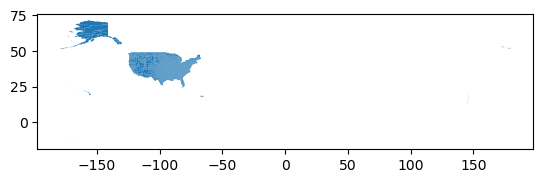

In [19]:
# 5. Plot the geo-dataframe.
# simple plot
county.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [20]:
# the state FP code is 36
# selet statefp of 36
ny_counties = county[county.statefp=="36"]
ny_counties.head()

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [21]:
# 1. Print the names of counties in ny_counties, without repetition.
print(ny_counties.name.unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [22]:
# 2. Print the names of counties in spills_per_county, without repetition. 
print(spills_per_county.county.unique())

#### (Do you notice anything?)
# ANSWER: I notice there is quite a bit of overlap, but there are some in the counties that are def not new york, 
# like 'New Jersey - Region 2'

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


**ANSWER: I notice there is quite a bit of overlap, but there are some in the counties df that are def not new york, like 'New Jersey - Region 2'**

In [23]:
# 3. Use the numpy function setdiff1d() to find the county names that are in spills_per_county, but not in ny_counties. 

# Return the unique values in ar1 (spills_per_county) that are not in ar2 (ny_counties).
# Ex: np.setdiff1d(a, b)

# 1 make it an np array
ny_counties_array = ['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster', 'St. Lawrence',
 'Schuyler', 'Essex', 'Suffolk', 'Hamilton', 'Dutchess', 'Otsego', 'Tompkins',
 'Albany', 'Cayuga', 'Greene', 'Herkimer', 'Warren', 'Jefferson', 'Clinton',
 'Nassau', 'Madison', 'Washington', 'Westchester', 'Lewis', 'Ontario',
 'Cortland', 'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
 'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie', 'Broome',
 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne', 'Niagara', 'Kings',
 'Chemung', 'Wyoming', 'New York', 'Columbia', 'Chautauqua', 'Franklin',
 'Onondaga', 'Chenango', 'Fulton', 'Rockland', 'Livingston', 'Delaware',
 'Orange', 'Schenectady', 'Bronx']

spills_per_county_array = ['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua',
 'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware',
 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene',
 'Hamilton', 'Herkimer', 'Jefferson', 'Kings', 'Lewis', 'Livingston', 'Madison',
 'Monroe', 'Montgomery', 'Nassau', 'New Jersey - Region 2', 'New York',
 'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego',
 'Otsego', 'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland', 'Saratoga',
 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'St Lawrence', 'Steuben',
 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Tuscarora Indian Reservation',
 'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates']

np.setdiff1d(spills_per_county_array, ny_counties_array)



array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype='<U28')

In [24]:
# 4. Find the county names that are in ny_counties, but not in spills_per_county.

np.setdiff1d(ny_counties_array, spills_per_county_array)

array(['St. Lawrence'], dtype='<U12')

In [25]:
# 5. Check the number of spills in 'Tuscarora Indian Reservation'.
tir = spills_per_county[spills_per_county.county=='Tuscarora Indian Reservation']

# print length of the tir dataframe
print(len(tir)) # 1 spill

1


**ANSWER: 1 SPILL**

### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [26]:
# 1. Check the row in spills_per_county that has 'St Lawrence'
st_l_row = spills_per_county.loc[spills_per_county["county"] == "St Lawrence"]
st_l_row #there are 65 spills, and the index is 50

,county,n_spills
50,St Lawrence,65


In [27]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [28]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [29]:
# 4. Use the st_lawrence_index and at to update St Lawrence name in spills_per_county dataframe

# access value at row with index=st_lawrence_index and column='county' and change to "St. Lawrence"
spills_per_county.at[st_lawrence_index,'county'] = "St. Lawrence"

In [30]:
# 5. 
# pull the row with index st_lawrence_index in column county
spills_per_county.at[st_lawrence_index,'county'] # yep thats it!

'St. Lawrence'

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [36]:
# 1. inner join of the spills_per_county and ny_counties.

# First need a matching column name, need to change the name of the ny_counties column
ny_counties = ny_counties.rename(columns ={'name':'county'})


# merge dataframes 
# output_df = pd.merge(left_df,
               #      right_df, 
               #      how = type_of_join, 
               #      on = column_to_join)

joined = pd.merge(spills_per_county,
                            ny_counties,
                            how='inner',
                            on='county')

In [38]:
# 2. Over-write ny_counties as the inner join of the spills_per_county and ny_counties dataframes
ny_counties = joined
ny_counties

,county,n_spills,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,Albany,198,36,001,00974099,36001,Albany County,06,H1,G4020,None,None,None,A,1354273421,26971925,+42.5882401,-073.9740095,"POLYGON ((-73.96379 42.44162, -73.96666 42.441..."
1,Allegany,30,36,003,00974100,36003,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
2,Bronx,138,36,005,00974101,36005,Bronx County,06,H6,G4020,None,None,None,C,109235674,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
3,Broome,74,36,007,00974102,36007,Broome County,06,H1,G4020,None,None,None,A,1827626589,25078245,+42.1619773,-075.8302833,"POLYGON ((-75.74223 41.99805, -75.75080 41.997..."
4,Cattaraugus,46,36,009,00974103,36009,Cattaraugus County,06,H1,G4020,None,None,None,A,3388125876,36783591,+42.2390986,-078.6623320,"POLYGON ((-78.69725 41.99867, -78.69881 41.998..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Washington,95,36,115,00974155,36115,Washington County,06,H1,G4020,None,None,None,A,2152773115,38123568,+43.3123766,-073.4394282,"POLYGON ((-73.26504 43.10615, -73.26504 43.106..."
58,Wayne,37,36,117,00974156,36117,Wayne County,06,H1,G4020,None,None,None,A,1563913376,2018184723,+43.2181139,-077.0494024,"POLYGON ((-76.70573 43.13143, -76.70561 43.129..."
59,Westchester,707,36,119,00974157,36119,Westchester County,06,H1,G4020,None,None,None,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985..."
60,Wyoming,23,36,121,00974158,36121,Wyoming County,06,H1,G4020,None,None,None,A,1535219438,9158067,+42.7013627,-078.2285667,"POLYGON ((-77.95538 42.71371, -77.95537 42.713..."


In [47]:
# add one spill to Niagara county
# check how many spills there are in Niagara county
ny_counties.loc[ny_counties.county=='Niagara'] # 85



,county,n_spills,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,num_spills
31,Niagara,86,36,063,00974130,36063,Niagara County,06,H1,G4020,None,None,None,A,1352887560,1598842379,+43.2726719,-078.8129431,"POLYGON ((-78.49165 43.08396, -78.49179 43.084...",86.0


In [46]:
# 85 + 1 = 86, change to 86
ny_counties.loc[ny_counties.county=='Niagara', 'n_spills']=86

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [93]:
type(ny_counties) # why is it not a geopandas dataset??

pandas.core.frame.DataFrame

In [78]:
# ensure it's a geodataframe
ny_geo = gpd.GeoDataFrame(ny_counties)
type(ny_geo)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:title={'center':'Number of petroleum spills per county in New York State in 2023'}>

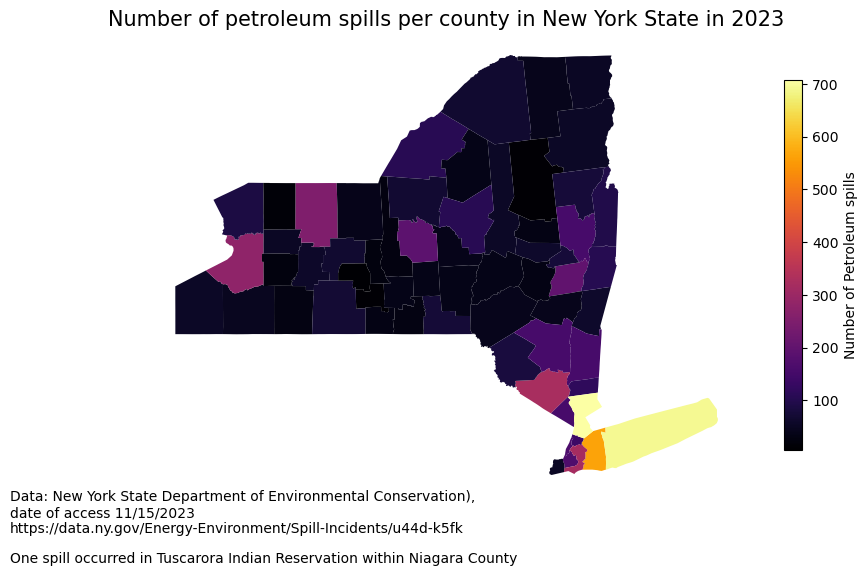

In [98]:
# figsize updates the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# --------------------------
# remove the axis box around the map
ax.axis('off')

# update title
ax.set_title('Number of petroleum spills per county in New York State in 2023',
fontsize=15)

# annotate the data source
ax.annotate("Data: New York State Department of Environmental Conservation), \ndate of access 11/15/2023 \nhttps://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(0.01, .06), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='black')

# annotate the spill in Tuscarora Indian Reservation
ax.annotate("One spill occurred in Tuscarora Indian Reservation within Niagara County", 
            xy=(0.01, .01), # position
            xycoords='figure fraction', 
            fontsize=10, 
            color='black')

# --------------------------
# add counties
ny_geo.plot(ax=ax, 
                  column='n_spills', # color points according to primsource value
                  legend=True,    # add legend
                  cmap='inferno', # use a continuous!
                legend_kwds={"shrink":.8,
                                    'label': "Number of Petroleum spills"
                                    }
           )

##### Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.